**PROYECTO ALGEBRA LINEAL**

PRESENTADO POR:

* JHON JAIRO CASTILLO

* GILBER CORRALES

* JUAN CAMILO TOBAR

* SEBASTIAN MORALES


##EJEMPLO 1

**SOLUCION DE UN SISTEMA DE ECUACIONES 3X3**

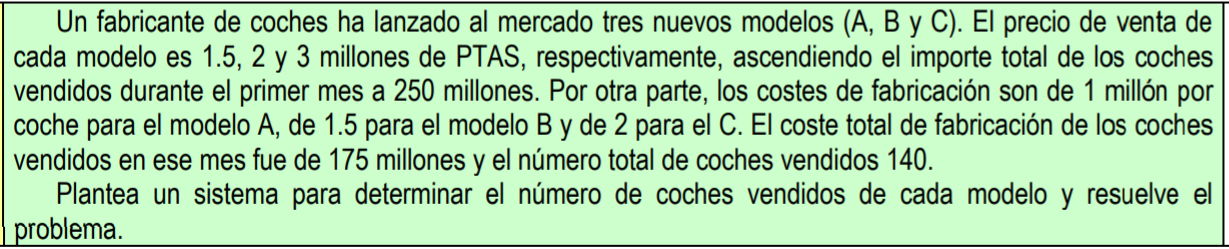



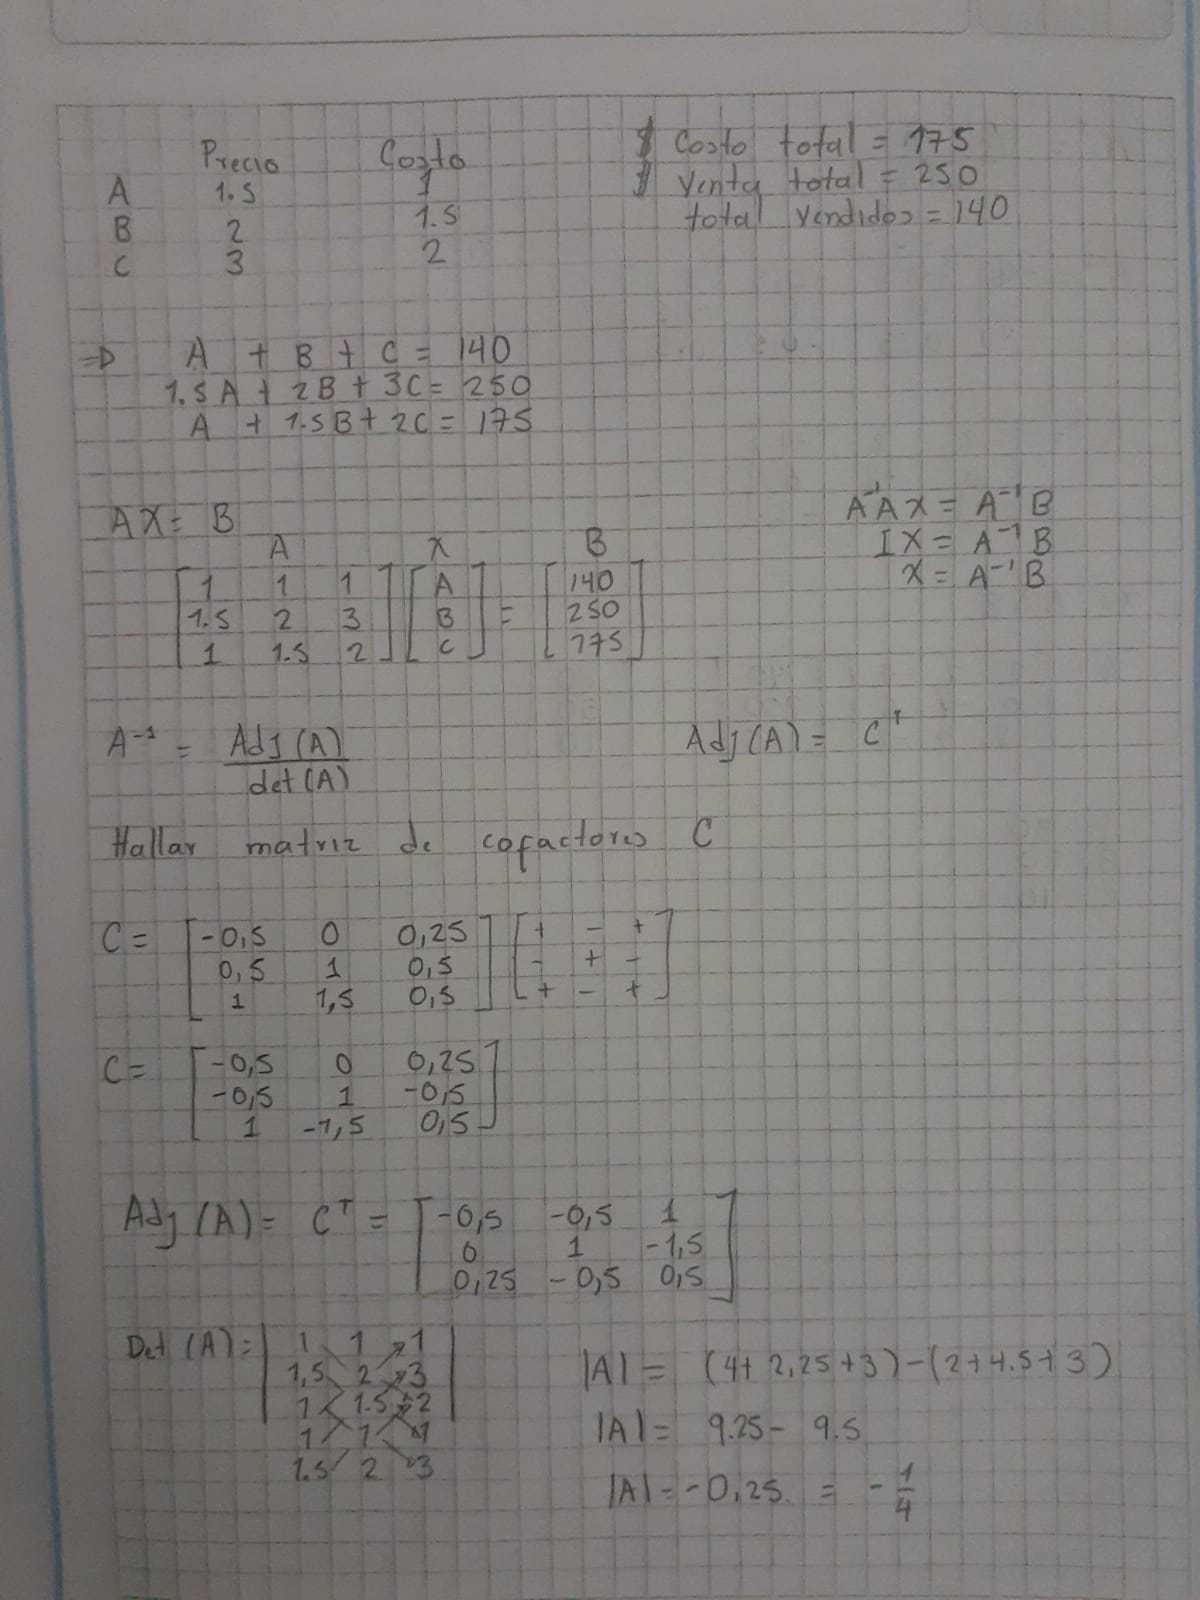

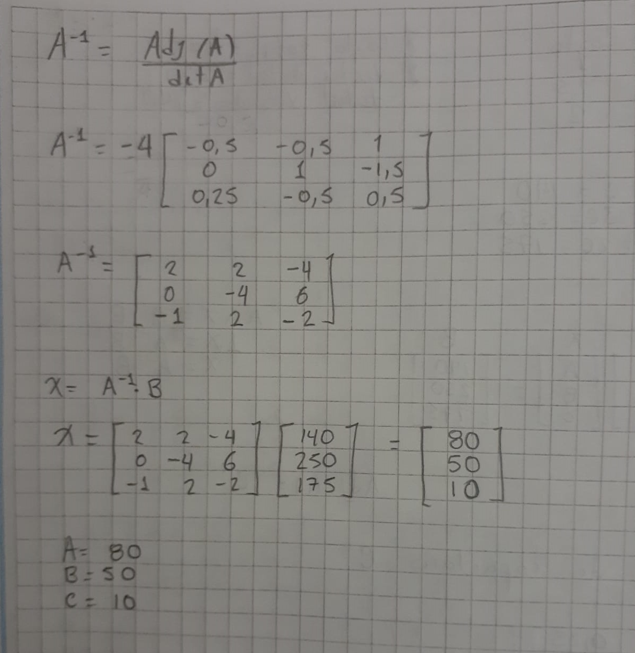

In [ ]:
import numpy as np
from numpy import matrix,zeros,size
from numpy.linalg import det
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


A=np.array([[1,1,1],[1.5,2,3],[1,1.5,2]],dtype='f')
B=np.array([140,250,175],dtype='f')
x=np.linalg.solve(A,B)
print(x)

[80. 50. 10.]


**Metodo de resolver sistemas de ecuaciones de solucion unica AX=B**

In [ ]:
def ResolverSistema(A,B):

  detA=np.linalg.det(A)

  if detA==0:
    print("el sistema de ecuaciones tiene infinitas soluciones ya que su determinante es 0")

  else:
    MC=matrix(zeros((3,3))) # Matriz de cofactores
    idx=matrix(range(3))
    for i in range(size(A,0)):
        for j in range(size(A,1)):
            fidx=idx[idx!=i]
            cidx=idx[idx!=j]
            cof=A[[[fidx[0,0]],[fidx[0,1]]],cidx]
            MC[i,j]=pow(-1,i+j)*det(cof)

    MADJ=MC.transpose() # Matriz adjunta 
    inv=(1/detA)*MADJ
    res=inv.dot(B)

    print ("Matriz de cofactores\n",MC,"\n")
    print ("Matriz adjunta\n",MADJ,"\n")
    print ("el determinante de A es:", detA,"\n")
    print ("El vector solucion del sistema es: ", res, "\n")
    


In [ ]:
ResolverSistema(A,B)

Matriz de cofactores
 [[-0.5  -0.    0.25]
 [-0.5   1.   -0.5 ]
 [ 1.   -1.5   0.5 ]] 

Matriz adjunta
 [[-0.5  -0.5   1.  ]
 [-0.    1.   -1.5 ]
 [ 0.25 -0.5   0.5 ]] 

el determinante de A es: -0.25 

El vector solucion del sistema es:  [[80. 50. 10.]] 



**Funcion de grafico de planos**

In [ ]:
def graficarSolucion (A,B):

  ax = -10     # Intervalo X
  bx = 100
  ay = ax-2   # Intervalo Y
  by = bx+2 

  muestras = 20

  xi = np.linspace(ax,bx, muestras)
  yi = np.linspace(ay,by, muestras)
  Xi, Yi = np.meshgrid(xi,yi)

  # PROCEDIMIENTO --------
  # Ecuaciones de planos
  Z0 =  (-A[0,0]*Xi - A[0,1]*Yi + B[0])/A[0,2]
  Z1 =  (-A[1,0]*Xi - A[1,1]*Yi + B[1])/A[1,2]
  Z2 =  (-A[2,0]*Xi - A[2,1]*Yi + B[2])/A[2,2]


  # solución al sistema
  if det(A)==0:
    punto=[0,0,0]
  else:
    punto = np.linalg.solve(A,B)

  # SALIDA
  print('respuesta de A.X=B : ')
  print(punto)


  # GRAFICA de planos
  figura = plt.figure()
  grafica = figura.add_subplot(111, projection='3d')

  grafica.plot_surface(Xi,Yi,Z0,cmap=cm.Accent,alpha=0.5,rstride=100,cstride=100)
  grafica.plot_surface(Xi,Yi,Z1,cmap=cm.Paired,alpha=0.5,rstride=100,cstride=100)
  grafica.plot_surface(Xi,Yi,Z2,cmap=cm.Pastel1,alpha=0.5,rstride=100,cstride=100)

  # Punto solución del sistema 3x3
  grafica.scatter(punto[0],punto[1],punto[2], color = 'red',marker='o', label ='punto',linewidth = 6)


  grafica.set_title('Sistema de ecuaciones 3x3')
  grafica.set_xlabel('x')
  grafica.set_ylabel('y')
  grafica.set_zlabel('z')
 
  grafica.view_init(45, 45)
  # rotacion de ejes
  for angulo in range(45, 360+45, 5 ):
      grafica.view_init(45, angulo)
      plt.draw()
     
  plt.show()

respuesta de A.X=B : 
[80. 50. 10.]


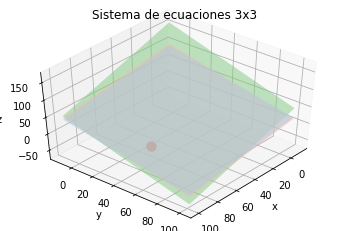

In [ ]:
graficarSolucion(A,B)

**Metodo resolver sistema de ecuaciones con infinitas soluciones**

In [ ]:
A1=np.array([[1,2,3],[4,5,6],[2,7,12]]) #infinitas soluciones
B1=np.array([9,24,30]) #infinitas soluciones

In [ ]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1 
        

In [ ]:
def matriztoecuation(A,B,F,C):
  te = ['X', 'Y', 'Z', 'W']
  infoo=['','']
  ec=['']
  for fi in range(F):

    for co in range(C):
      var=str(A[fi][co])
      if A[fi][co] >=0:
        sim='+'
      else:
        sim=''
      rrr=' '+sim+var+te[co]+' '
      infoo.append(rrr)

  
    s=str(B[fi])
    ee=listToString(infoo)+' = '+s
    ec.append(listToString(ee))
    infoo.clear()
  
  return(ec)

In [ ]:
matriztoecuation(A1,B1,3,3)

['',
 ' +1.0X  +2.0Y  +3.0Z  = 9.0',
 ' +4.0X  +5.0Y  +6.0Z  = 24.0',
 ' +2.0X  +7.0Y  +12.0Z  = 30.0']

In [ ]:
def sol_matriz(A,B,C,F):
  N=len(B)
  #ELIMINACIÓN GAUSSIANA
  for i in range(N-1):
    B[i]=B[i]/A[i][i]
    A[i]=A[i]/A[i][i]
    for j in range(i+1,N):
      B[j]=B[j]-A[j][i]*B[i]
      A[j]=A[j]-A[j][i]*A[i]
  i=N-1
  B[i]=B[i]/A[i][i]
  A[i]=A[i]/A[i][i]
  A=np.nan_to_num ( A, nan = 0.0)
  B=np.nan_to_num ( B, nan = 0.0)
  
  if sum(A[N-1])==sum(np.zeros((C))):
    infi=N-2
  else:
    infi=N-1
  
  Ubi=np.where(A[infi])
  ubi=Ubi[0][0]
  inn=infi
  for kk in range(N-2):

    for k in reversed(range(infi)):
      B[k]=B[k]-A[k][ubi]*B[inn]        
      A[k]=A[k]-A[k][ubi]*A[inn]

    
    ubi=ubi-1
    inn=inn-1
  
  return(A,B)

**Ejemplo infinitas soluciones**

In [ ]:
sol_matriz(A1,B1,3,3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


(array([[ 1.,  0., -1.],
        [-0.,  1.,  2.],
        [ 0.,  0.,  0.]]), array([1., 4., 0.]))

respuesta de A.X=B : 
[0, 0, 0]


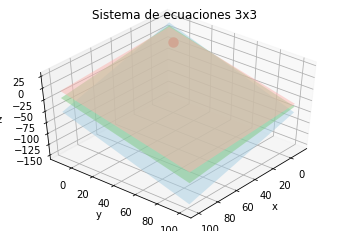

In [ ]:
graficarSolucion(A1,B1)

##EJEMPLO 2

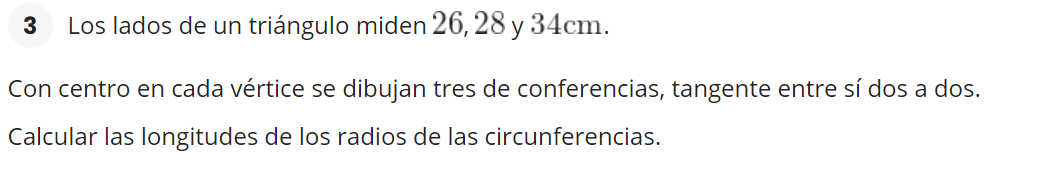

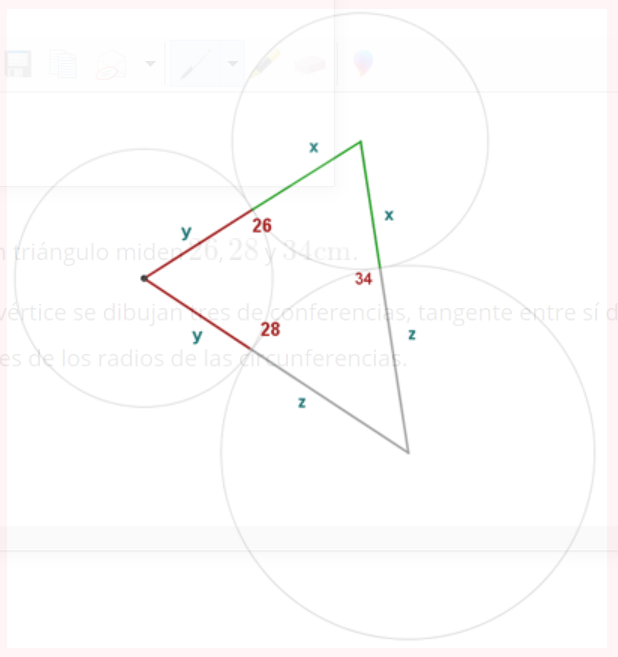

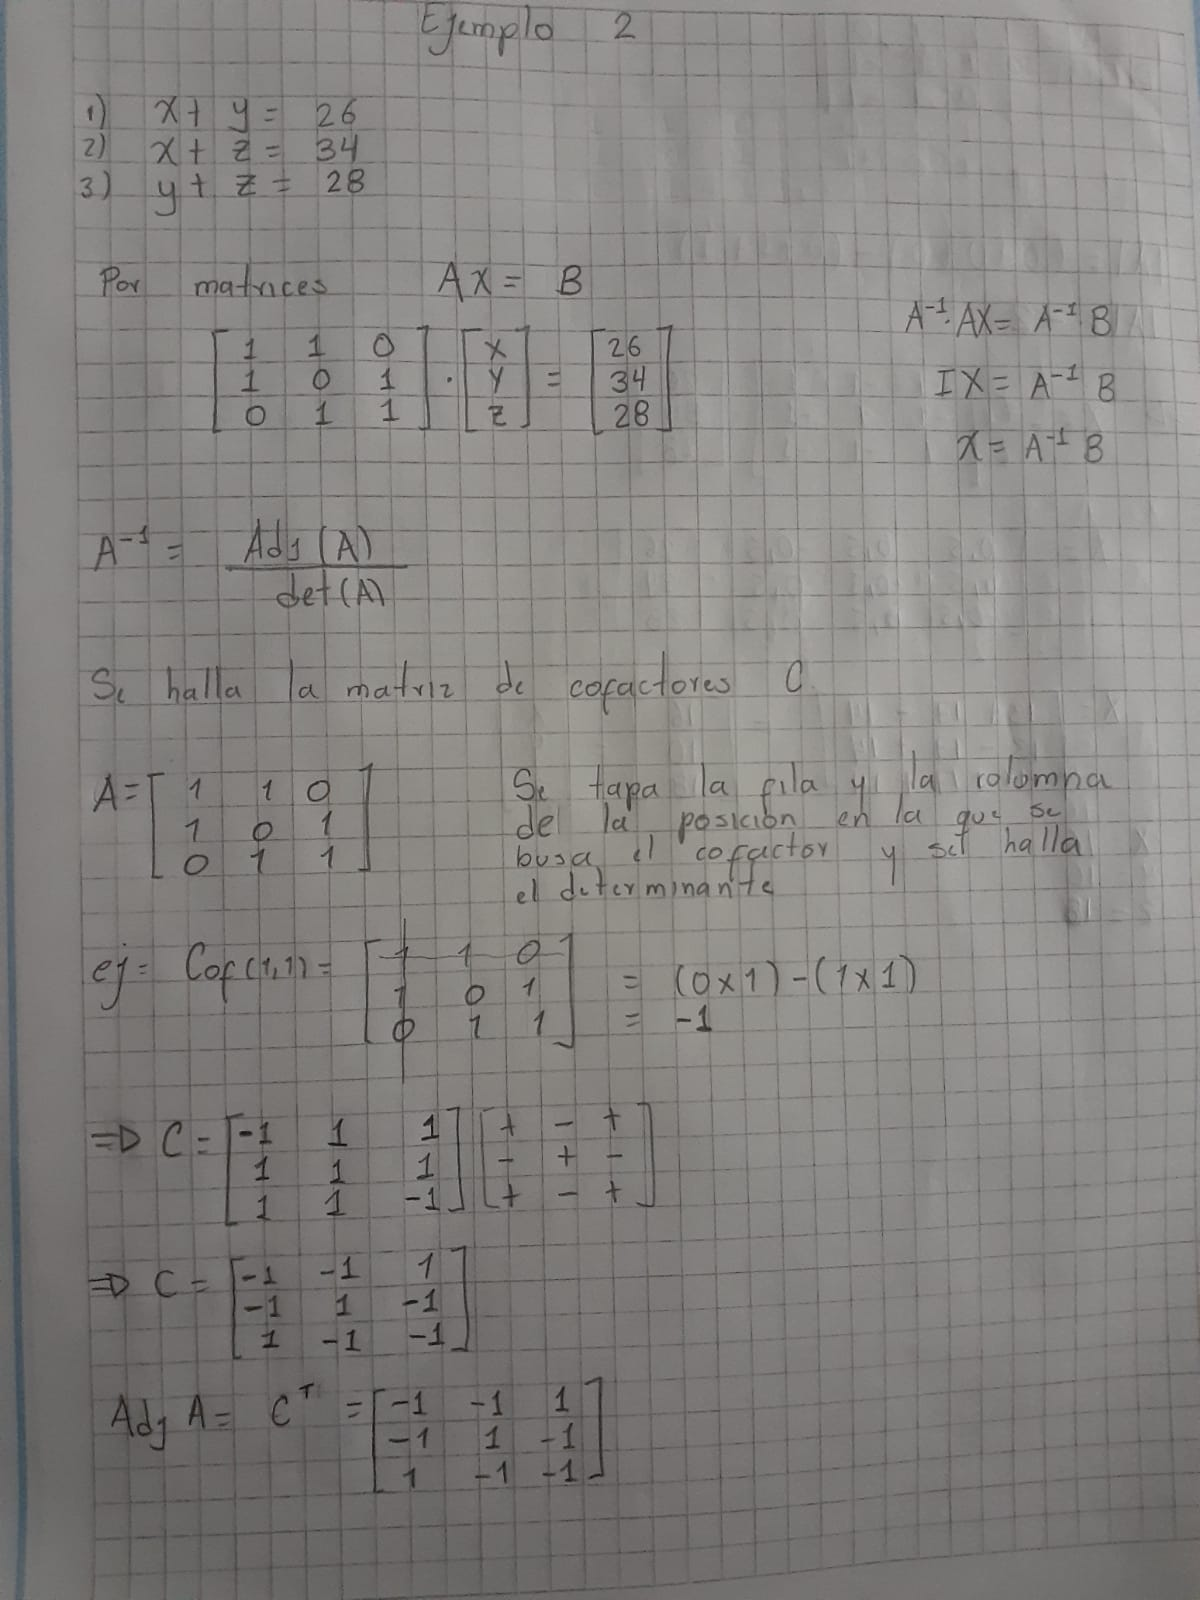

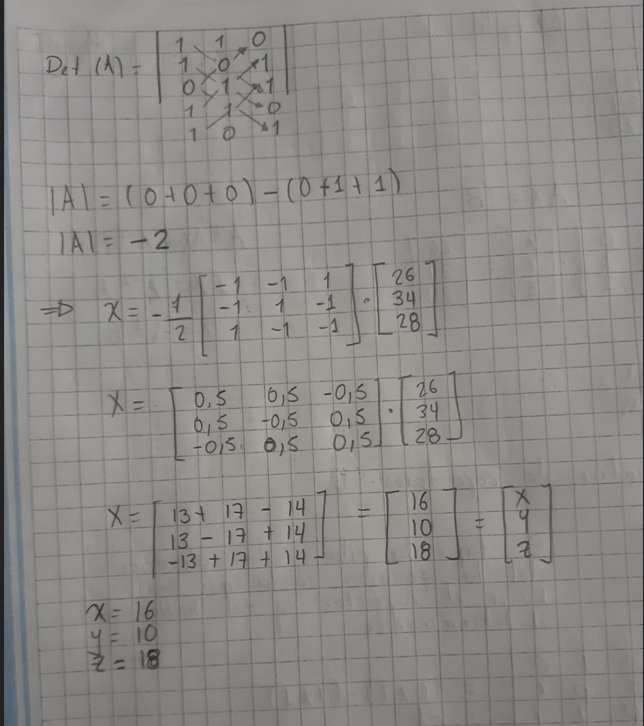

In [ ]:
A2=np.array([[1,1,0],[1,0,1],[0,1,1]])
B2=np.array([26,34,28])

ResolverSistema(A2,B2)

Matriz de cofactores
 [[-1. -1.  1.]
 [-1.  1. -1.]
 [ 1. -1. -1.]] 

Matriz adjunta
 [[-1. -1.  1.]
 [-1.  1. -1.]
 [ 1. -1. -1.]] 

el determinante de A es: -2.0 

El vector solucion del sistema es:  [[16. 10. 18.]] 



respuesta de A.X=B : 
[16. 10. 18.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:152: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


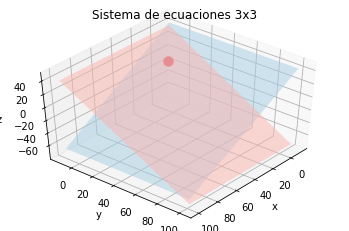

In [ ]:
graficarSolucion(A2,B2)

--------------------------
Ejemplo 2 infinitas soluciones

In [ ]:
A3=np.array([[1.0,2,-3],[2,1,-3],[0,1,-1]])
B3=np.array([-4.0,-4,4])

ResolverSistema(A3,B3)

el sistema de ecuaciones tiene infinitas soluciones ya que su determinante es 0


In [ ]:
sol_matriz(A3,B3,3,3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


(array([[ 1.,  0., -1.],
        [-0.,  1., -1.],
        [ 0.,  0.,  0.]]),
 array([-1.33333333e+000, -1.33333333e+000,  1.79769313e+308]))

respuesta de A.X=B : 
[0, 0, 0]


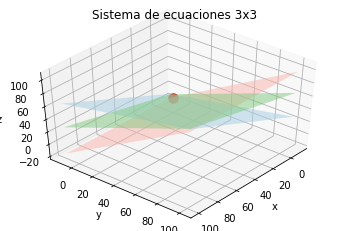

In [ ]:
graficarSolucion(A3,B3)